<a href="https://colab.research.google.com/github/Chetan823/Binary_Image_Classifier/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:11<00:00, 132MB/s]
100% 1.06G/1.06G [00:11<00:00, 100MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
# Generators
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_data = train_data.map(process)
test_data = test_data.map(process)

In [22]:
# Create CNN model

model = Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides =2, padding = 'valid'),
 
    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides =2, padding = 'valid'),

    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides =2, padding = 'valid'),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
history = model.fit(train_data, epochs=10, validation_data = test_data)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3789 - accuracy: 0.5626 - val_loss: 0.6478 - val_accuracy: 0.6014
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6763 - accuracy: 0.5756 - val_loss: 0.6394 - val_accuracy: 0.6188
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6257 - accuracy: 0.6263 - val_loss: 0.6282 - val_accuracy: 0.5810
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5430 - accuracy: 0.7066 - val_loss: 0.5427 - val_accuracy: 0.7358
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4845 - accuracy: 0.7487 - val_loss: 0.4937 - val_accuracy: 0.7684
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4285 - accuracy: 0.7839 - val_loss: 0.9231 - val_accuracy: 0.5770
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3774 - accuracy: 0.8137 - val_loss: 0.5021 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

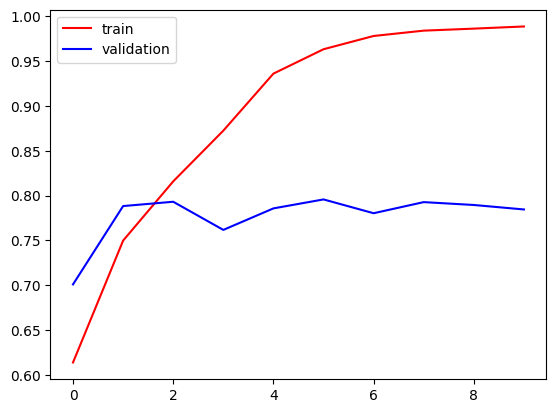

In [18]:
import matplotlib.pyplot as plt

# Before adding  Dropout nd Batch Norm (Overfitting)

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

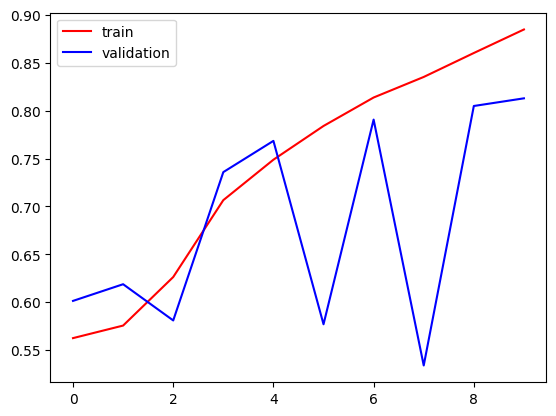

In [26]:
import matplotlib.pyplot as plt

# After adding  Dropout nd Batch Norm 

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

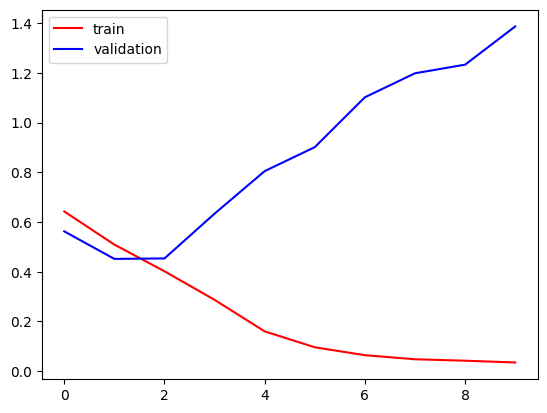

In [19]:
# Before adding  Dropout nd Batch Norm (Overfitting)

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

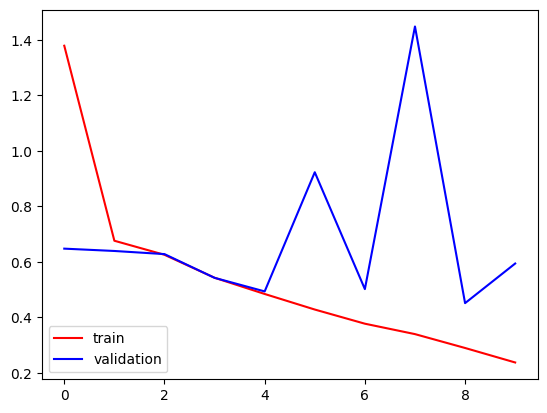

In [27]:
# After adding  Dropout nd Batch Norm

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show

In [ ]:
# Ways to reduce Overfitting
# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout  
# Batch Norm
# Reduce Complexity

# We are going to do Dropout and Batch Norm in this project.


In [29]:
import cv2

In [30]:
test_img = cv2.imread('/content/Pug-dog.webp')

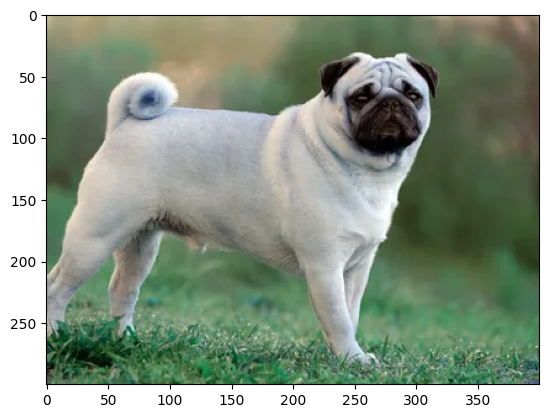

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(300, 400, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape(1,256,256,3)

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 288ms/step


array([[1.]], dtype=float32)

In [37]:
test_img2 = cv2.imread('/content/cat.jfif')

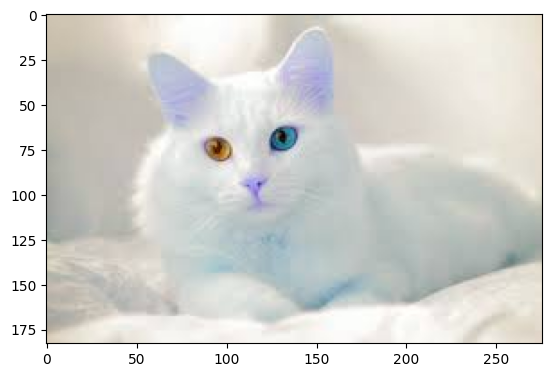

In [39]:
plt.imshow(test_img2)

In [40]:
test_img2.shape

(183, 276, 3)

In [42]:
test_img2 = cv2.resize(test_img2,(256,256))

In [43]:
test_input2 = test_img2.reshape(1,256,256,3)

In [44]:
model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [ ]:
# 0 is for Cat
# 1 is for Dog